# 15 - Deep Learning using keras

by [Alejandro Correa Bahnsen](albahnsen.com/) and [Jesus Solano](https://github.com/jesugome)

version 1.6, June 2020


## Part of the class [AdvancedMethodsDataAnalysisClass](https://github.com/albahnsen/AdvancedMethodsDataAnalysisClass/tree/master/notebooks)



This notebook is licensed under a [Creative Commons Attribution-ShareAlike 3.0 Unported License](http://creativecommons.org/licenses/by-sa/3.0/deed.en_US). Special thanks goes to [Valerio Maggio](https://mpba.fbk.eu), Fondazione Bruno Kessler

<img src="./images/keras-logo-small.jpg" width="20%" />

## Keras: Deep Learning library for Theano and TensorFlow

>Keras is a minimalist, highly modular neural networks library, written in Python and capable of running on top of either TensorFlow or Theano. 

>It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research.
ref: https://keras.io/

<a name="kaggle"></a>
### Boston Housing Data

In [1]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

##### For this section we will use the Boston Housing Data. 

# Single Layer Neural Network


## Data Preparation

In [2]:
import pandas as pd
from sklearn.datasets import load_boston
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

X = boston.drop(boston.columns[-1],axis=1)

Y = pd.DataFrame(np.array(boston_dataset.target), columns=['labels'])

boston.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
# Split datasets.
X_train, X_test , Y_train, Y_test = train_test_split(X,Y, test_size=0.3 ,random_state=22)

# Normalize Data
from sklearn.preprocessing import StandardScaler

# Define the Preprocessing Method and Fit Training Data to it
scaler = StandardScaler()
scaler.fit(X)

# Make X_train to be the Scaled Version of Data
# This process scales all the values in all 6 columns and replaces them with the new values
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [5]:
# As it is a regression problem the output is a neuron.
output_var = Y_train.shape[1]
print(output_var, ' output variables')

dims = X_train.shape[1]
print(dims, 'input variables')

1  output variables
12 input variables


In [6]:
Y_train.shape 

(354, 1)

---

# Using Keras

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from livelossplot import PlotLossesKeras
from keras import backend as K

Using TensorFlow backend.


In [11]:
learning_rate = 0.01

In [12]:
K.clear_session()
print("Building model...")

print('Model variables: ', dims)

model = Sequential()
model.add(Dense(output_var, input_shape=(dims,)))

print(model.summary())

model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(X_train, Y_train, verbose=2,epochs=15)

Building model...
Model variables:  12
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 13        
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
 - 0s - loss: 470.9947
Epoch 2/15
 - 0s - loss: 307.5879
Epoch 3/15
 - 0s - loss: 198.7426
Epoch 4/15
 - 0s - loss: 138.1065
Epoch 5/15
 - 0s - loss: 96.7626
Epoch 6/15
 - 0s - loss: 72.3306
Epoch 7/15
 - 0s - loss: 56.7161
Epoch 8/15
 - 0s - loss: 46.5255
Epoch 9/15
 - 0s - loss: 40.8557
Epoch 10/15
 - 0s - loss: 37.1000
Epoch 11/15
 - 0s - loss: 35.1485
Epoch 12/15
 - 0s - loss: 32.7866
Epoch 13/15
 - 0s - loss: 31.5083
Epoch 14/15
 - 0s - loss: 30.5525
Epoch 15/15
 - 0s - loss: 29.9345


### Be more specific with hyperparameters...

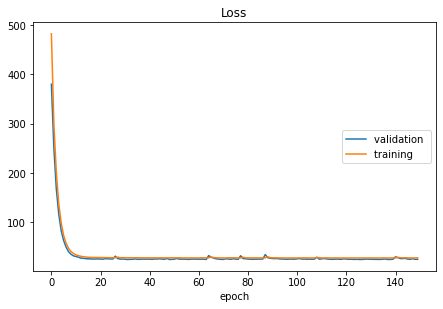

Loss
	validation       	 (min:   24.827, max:  380.004, cur:   25.234)
	training         	 (min:   27.828, max:  482.208, cur:   28.380)


In [13]:
import keras.optimizers as opts

K.clear_session()
print("Building model...")

print('Model variables: ', dims)

model = Sequential()
model.add(Dense(output_var, input_shape=(dims,)))

op = opts.SGD(lr=learning_rate)

model.compile(loss = 'mean_squared_error',
              optimizer = op)

model.fit(X_train, Y_train,
          verbose=1, 
          epochs=150, 
          validation_data=[X_test,Y_test],
          callbacks=[PlotLossesKeras()])

Simplicity is pretty impressive right? :)

Now lets understand:
<pre>The core data structure of Keras is a <b>model</b>, a way to organize layers. The main type of model is the <b>Sequential</b> model, a linear stack of layers.</pre>


What we did here is stacking a Fully Connected (<b>Dense</b>) layer of trainable weights from the input to the output and an <b>Activation</b> layer on top of the weights layer.

##### Dense

```python
from keras.layers.core import Dense

Dense(units, activation=None, use_bias=True, 
      kernel_initializer='glorot_uniform', bias_initializer='zeros', 
      kernel_regularizer=None, bias_regularizer=None, 
      activity_regularizer=None, kernel_constraint=None, bias_constraint=None)
```

* `units`: int > 0.

* `init`: name of initialization function for the weights of the layer (see initializations), or alternatively, Theano function to use for weights initialization. This parameter is only relevant if you don't pass a weights argument.

* `activation`: name of activation function to use (see activations), or alternatively, elementwise Theano function. If you don't specify anything, no activation is applied (ie. "linear" activation: a(x) = x).

* `weights`: list of Numpy arrays to set as initial weights. The list should have 2 elements, of shape (input_dim, output_dim) and (output_dim,) for weights and biases respectively.

* `kernel_regularizer`: instance of WeightRegularizer (eg. L1 or L2 regularization), applied to the main weights matrix.

* `bias_regularizer`: instance of WeightRegularizer, applied to the bias.

* `activity_regularizer`: instance of ActivityRegularizer, applied to the network output.

* `kernel_constraint`: instance of the constraints module (eg. maxnorm, nonneg), applied to the main weights matrix.

* `bias_constraint`: instance of the constraints module, applied to the bias.

* `use_bias`: whether to include a bias (i.e. make the layer affine rather than linear).

## (some) others `keras.core.layers`

* `keras.layers.core.Flatten()`
* `keras.layers.core.Reshape(target_shape)`
* `keras.layers.core.Permute(dims)`

```python
model = Sequential()
model.add(Permute((2, 1), input_shape=(10, 64)))
# now: model.output_shape == (None, 64, 10)
# note: `None` is the batch dimension
```

* `keras.layers.core.Lambda(function, output_shape=None, arguments=None)`
* `keras.layers.core.ActivityRegularization(l1=0.0, l2=0.0)`

<img src="./images/dl_overview.png" >

Credits: Yam Peleg ([@Yampeleg](https://twitter.com/yampeleg))

##### Activation

```python
from keras.layers.core import Activation

Activation(activation)
```

**Supported Activations** : [https://keras.io/activations/]

**Advanced Activations**: [https://keras.io/layers/advanced-activations/]

##### Optimizer

If you need to, you can further configure your optimizer. A core principle of Keras is to make things reasonably simple, while allowing the user to be fully in control when they need to (the ultimate control being the easy extensibility of the source code).
Here we used <b>SGD</b> (stochastic gradient descent) as an optimization algorithm for our trainable weights.  

<img src="http://sebastianruder.com/content/images/2016/09/saddle_point_evaluation_optimizers.gif" width="40%">

Source & Reference: http://sebastianruder.com/content/images/2016/09/saddle_point_evaluation_optimizers.gif

"Data Sciencing" this example a little bit more
=====

What we did here is nice, however in the real world it is not useable because of overfitting.
Lets try and solve it with cross validation.

##### Overfitting

In overfitting, a statistical model describes random error or noise instead of the underlying relationship. Overfitting occurs when a model is excessively complex, such as having too many parameters relative to the number of observations. 

A model that has been overfit has poor predictive performance, as it overreacts to minor fluctuations in the training data.


<img src="https://raw.githubusercontent.com/leriomaggio/deep-learning-keras-tensorflow/master/imgs/overfitting.png">

<pre>To avoid overfitting, we will first split out data to training set and test set and test out model on the test set.
Next: we will use two of keras's callbacks <b>EarlyStopping</b> and <b>ModelCheckpoint</b></pre>

---

Let's see first the model we implemented

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 13        
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [15]:
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [16]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.15, random_state=42)

fBestModel = 'best_model.h5' 
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1) 
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

model.fit(X_train, Y_train, validation_data = (X_val, Y_val), epochs=50, 
          batch_size=128, verbose=True, callbacks=[best_model, early_stop]) 

Train on 300 samples, validate on 54 samples
Epoch 1/50
300/300 [==============================] - 0s 33us/step - loss: 29.1192 - val_loss: 21.3461
Epoch 2/50
300/300 [==============================] - 0s 23us/step - loss: 28.8631 - val_loss: 21.6367
Epoch 3/50
300/300 [==============================] - 0s 26us/step - loss: 28.8431 - val_loss: 22.0328
Epoch 00003: early stopping


# Multi-Layer Fully Connected Networks

<img src="./images/MLP.png" width="65%">

#### Forward and Backward Propagation

<img src="./images/backprop.png" width="80%">

**Q:** _How hard can it be to build a Multi-Layer Fully-Connected Network with keras?_

**A:** _It is basically the same, just add more layers!_

In [17]:
K.clear_session()
print("Building model...")
model = Sequential()
model.add(Dense(256, input_shape=(dims,),activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(output_var))
model.add(Activation('relu'))
model.compile(optimizer='sgd', loss='mean_squared_error')
model.summary()

Building model...
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               3328      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 69,377
Trainable params: 69,377
Non-trainable params: 0
_________________________________________________________________


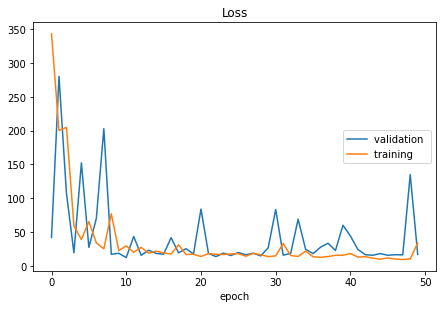

Loss
	validation       	 (min:   12.210, max:  280.432, cur:   17.181)
	training         	 (min:    9.422, max:  343.354, cur:   33.957)


In [18]:
model.fit(X_train, Y_train,
          validation_data = (X_val, Y_val),
          epochs=50, 
          callbacks=[PlotLossesKeras()])

What does the cost function behavior mean over the traning in the above plot? 

---

# Your Turn!

## Hands On - Keras Fully Connected


Take couple of minutes and try to play with the number of layers and the number of parameters in the layers to get the best results. 

In [ ]:
K.clear_session()
print("Building model...")
model = Sequential()
model.add(Dense(256, input_shape=(dims,),activation='relu'))

# ...
# ...
# Play with it! add as much layers as you want! try and get better results.

model.add(Dense(output_var))
model.add(Activation('relu'))
model.compile(optimizer='sgd', loss='mean_squared_error')
model.summary()


In [ ]:
model.fit(X_train, Y_train,
          validation_data = (X_val, Y_val),
          epochs=50, 
          callbacks=[PlotLossesKeras()])